<a href="https://colab.research.google.com/github/soobook/PyTorch-DL/blob/main/code/PT07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7회차: CNN을 활용한 컬러 이미지 분류 (1) – 개념 및 기본 모델

### CIFAR-10 데이터셋

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# 1. 변환 정의
transform = transforms.ToTensor()

# 2. CIFAR-10 데이터셋 불러오기
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


In [ ]:
# 3. 데이터셋 통계
total_train = len(trainset) # 50,000
total_test = len(testset)   # 10,000
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names = trainset.classes  # 클래스 이름

# 4. 이미지 하나 꺼내서 shape 확인
sample_image, sample_label = trainset[0]
image_shape = sample_image.shape  # torch.Size([3, 32, 32])

# 5. 출력
print("CIFAR-10 Dataset 정보")
print(f"Train Set Size: {total_train}장")
print(f"Test Set Size: {total_test}장")
print(f"총 이미지 수: {total_train + total_test}장")
print(f"클래스 수: {len(class_names)}개")
print("클래스 목록:", class_names)
print(f"예시 이미지 크기: {image_shape} (채널, 높이, 너비)")
print(f"예시 이미지 라벨: {sample_label} ({class_names[sample_label]}) ")

CIFAR-10 Dataset 정보
Train Set Size: 50000장
Test Set Size: 10000장
총 이미지 수: 60000장
클래스 수: 10개
클래스 목록: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
예시 이미지 크기: torch.Size([3, 32, 32]) (채널, 높이, 너비)
예시 이미지 라벨: 6 (frog) 


### CIFAR-10 데이터셋 클래스 별 10가지 이미지 데이터 시각화

100%|██████████| 170M/170M [07:14<00:00, 392kB/s]


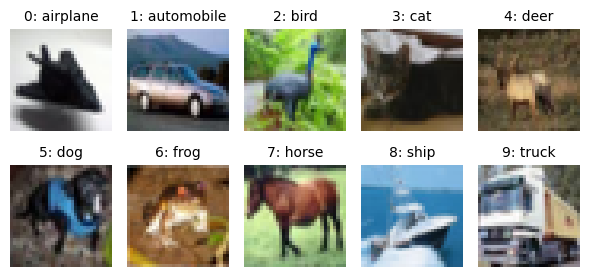

In [1]:
# torchvision의 CIFAR-10 데이터셋 유틸을 사용하기 위해 datasets 모듈을 임포트함
import torchvision.datasets as datasets
# 이미지 전처리를 위해 transforms 모듈을 임포트함
import torchvision.transforms as transforms
# 이미지 시각화를 위해 matplotlib.pyplot을 임포트함
import matplotlib.pyplot as plt
# 텐서 연산을 위해 torch를 임포트함
import torch

# (섹션) 1. CIFAR-10 데이터셋 불러오기
# 이미지를 텐서로 변환하기 위한 기본 변환(0~1 스케일) 정의함
transform = transforms.ToTensor()
# CIFAR-10 학습셋을 ./data 경로에 다운로드/로드하고, 위 변환을 적용함
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# (섹션) 2. 클래스 이름과 초기화
# CIFAR-10의 클래스 이름 목록을 가져옴 (예: 'airplane', 'automobile', ...)
class_names = trainset.classes
# 각 클래스별로 이미 수집했는지 여부를 저장할 불리언 리스트를 준비함
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_found = [False] * 10
# 각 클래스별로 시각화할 이미지를 담아둘 버퍼를 준비함
images_to_show = [None] * 10

# (섹션) 3. 각 클래스(0~9)마다 하나씩 이미지 수집
# 학습셋을 순회하며 (이미지, 라벨) 쌍을 하나씩 가져옴
for image, label in trainset:
    # 현재 라벨에 해당하는 클래스 이미지를 아직 수집하지 않았다면
    if not class_found[label]:
        # 해당 클래스에 첫 번째 이미지를 저장함
        images_to_show[label] = image
        # 해당 클래스를 수집 완료로 표시함
        class_found[label] = True
    # 10개 클래스 모두 수집이 끝났다면 루프를 조기 종료함
    if all(class_found):
        break

# (섹션) 4. 시각화: 2행 5열에 클래스 번호와 이름 함께 표시
# 전체 플롯의 크기를 (가로 6, 세로 3 인치)로 설정함
plt.figure(figsize=(6, 3))
# 0~9까지 각 클래스 인덱스에 대해 순회함
for i in range(10):
    # (C, H, W) 텐서를 시각화용 (H, W, C)로 차원 순서를 바꿈
    img = images_to_show[i].permute(1, 2, 0)  # (C, H, W) → (H, W, C)

    # 2행 5열 서브플롯 중 (i+1)번째 위치를 활성화함
    plt.subplot(2, 5, i + 1)
    # 위에서 만든 이미지를 화면에 표시함
    plt.imshow(img)
    # 서브플롯의 제목에 "라벨: 클래스명"을 표시함
    plt.title(f"{i}: {class_names[i]}", fontsize=10)
    # 축 눈금과 테두리를 숨김
    plt.axis('off')

# 서브플롯 사이 간격을 자동으로 맞춤
plt.tight_layout()
# 최종 플롯을 화면에 출력함
plt.show()

### 수업 종료

### 심화학습: 실행 시, 매번 서로 다른 클래스 10가지 이미지 데이터 시각화

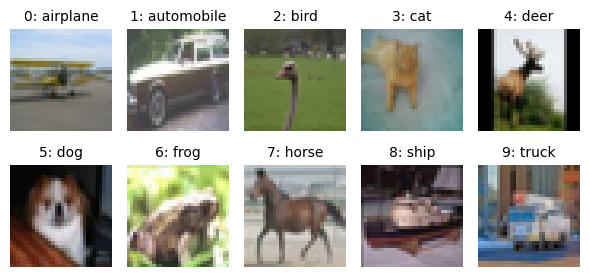

In [ ]:
# torchvision의 CIFAR-10 데이터셋을 사용하기 위한 임포트
import torchvision.datasets as datasets
# 이미지 전처리를 위한 transforms 임포트
import torchvision.transforms as transforms
# 시각화를 위한 matplotlib 임포트
import matplotlib.pyplot as plt
# 무작위 인덱스 생성을 위한 torch 임포트
import torch

# ===== 1) 하이퍼파라미터/옵션 =====
# 재현성을 원하면 정수값으로 바꾸세요. 매번 다르게 보려면 None 유지.
seed = None  # 예: seed = 42

if seed is not None:
    torch.manual_seed(seed)

# ===== 2) 데이터셋 로딩 =====
# 이미지를 텐서(0~1)로 변환
transform = transforms.ToTensor()
# CIFAR-10 학습셋 로드 (필요시 자동 다운로드)
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# ===== 3) 클래스/버퍼 초기화 =====
# CIFAR-10 클래스 이름
class_names = trainset.classes  # 길이 10
# 각 클래스별 선택 여부
class_found = [False] * 10
# 각 클래스별 표시할 이미지 보관(텐서)
images_to_show = [None] * 10

# ===== 4) 무작위 인덱스 생성 & 수집 루프 =====
# 0..len(trainset)-1 범위를 무작위 순열로 생성
perm = torch.randperm(len(trainset))

# 섞인 순서를 따라가며, 각 클래스의 첫 등장 이미지를 채택
for idx in perm.tolist():
    image, label = trainset[idx]
    if not class_found[label]:
        images_to_show[label] = image  # (C,H,W)
        class_found[label] = True
        # 10개 모두 채워지면 조기 종료
        if all(class_found):
            break

# ===== 5) 시각화 =====
plt.figure(figsize=(6, 3))
for i in range(10):
    # (C,H,W) → (H,W,C)로 변환
    img = images_to_show[i].permute(1, 2, 0)  # 시각화용

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{i}: {class_names[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

### 심화학습: 활성화 함수 LeLU 데이터 시각화

In [ ]:
%config InlineBackend.figure_format = 'retina'

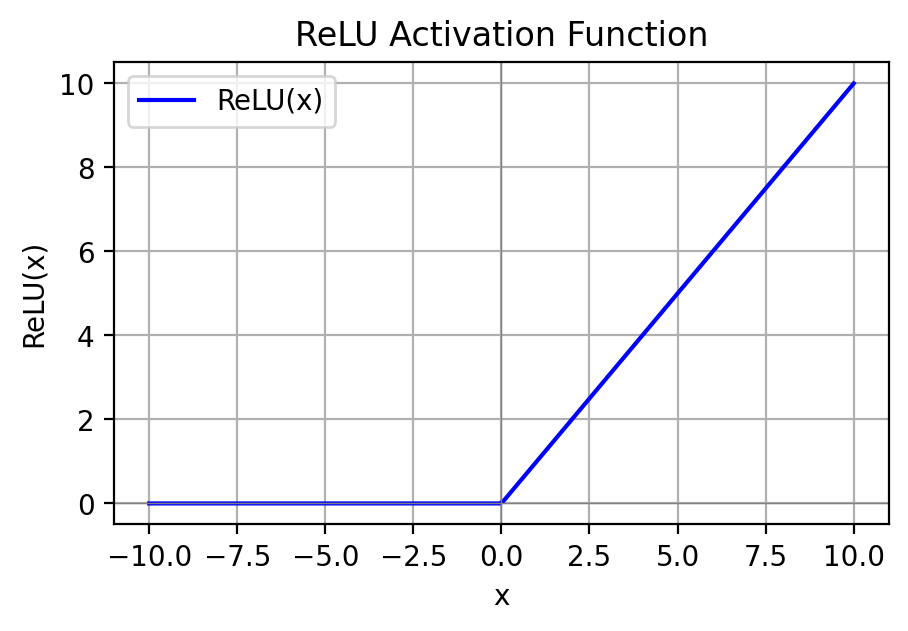

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 데이터 생성: -10부터 10까지 0.1 간격
x = np.linspace(-10, 10, 200)

# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# ReLU 적용
y = relu(x)

# 시각화
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()

### alexnet

In [ ]:
import torchvision.models as models
from torchvision.models import AlexNet_Weights

model = models.alexnet(weights=AlexNet_Weights.DEFAULT)
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 195MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 종료